In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')

## Regressão Linear Simples

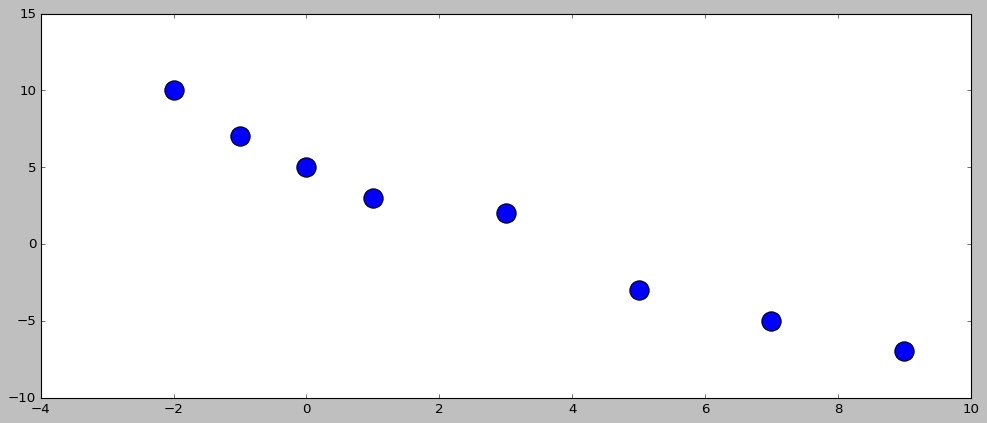

In [89]:
## verificando os dados para regressão linear simples

x = [-2,-1,0,1,3,5,7,9]
y = [10,7,5,3,2,-3,-5,-7]

plt.figure(figsize=(15,6))
plt.scatter(x=x,y=y,s=300)
plt.show()

In [11]:
np.corrcoef(x,y)

array([[ 1.        , -0.98727131],
       [-0.98727131,  1.        ]])

## VEJA O GOOGLE SHEETS

In [91]:
## conferindo o resultado do google sheets

from sklearn.linear_model import LinearRegression

x = np.array([-2,-1,0,1,3,5,7,9]).reshape(-1,1)
y = [10,7,5,3,2,-3,-5,-7]

lr = LinearRegression()
lr.fit(x,y)
lr.coef_, lr.intercept_

(array([-1.49771689]), 5.6187214611872145)

f(x) = -1.49771689 * x + 5.6187214611872145

In [92]:
def previsao(x_para_previsao):
    return x_para_previsao * lr.coef_ + lr.intercept_

In [94]:
previsao(10)

array([-9.35844749])

In [18]:
## utilizando o predict

lr.predict([[1]])

array([4.12100457])

In [105]:
y_pred = []

for valor in np.linspace(0,50,100):
    y_pred.append(lr.predict(valor.reshape(-1,1)).tolist()[0])

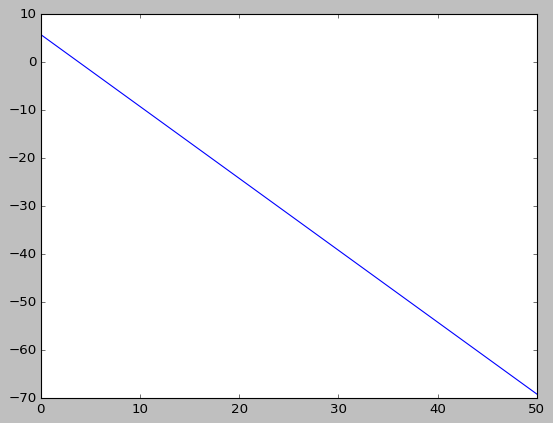

In [107]:
plt.plot(np.linspace(0,50,100),y_pred)

In [19]:
## gerando várias predições

for i in range(10):
  print(f'Predizendo para x={i} -- Resultado {lr.predict([[i]])}')

Predizendo para x=0 -- Resultado [5.61872146]
Predizendo para x=1 -- Resultado [4.12100457]
Predizendo para x=2 -- Resultado [2.62328767]
Predizendo para x=3 -- Resultado [1.12557078]
Predizendo para x=4 -- Resultado [-0.37214612]
Predizendo para x=5 -- Resultado [-1.86986301]
Predizendo para x=6 -- Resultado [-3.36757991]
Predizendo para x=7 -- Resultado [-4.8652968]
Predizendo para x=8 -- Resultado [-6.3630137]
Predizendo para x=9 -- Resultado [-7.86073059]


![extrapolation](https://media.buzzle.com/media/images-en/photos/education/mathematics/1200-607780-interpolation-vs-extrapolation.jpg)

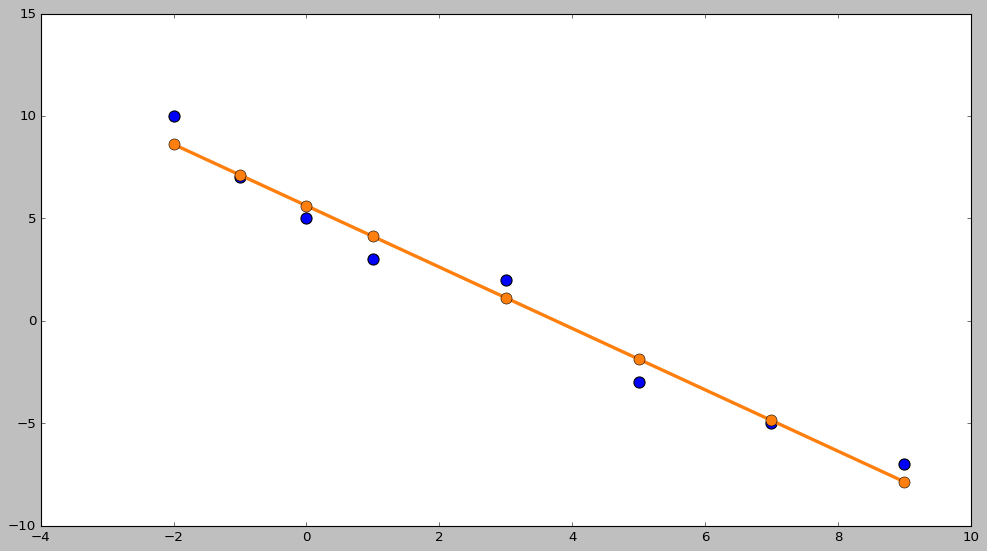

In [35]:
## verificando o modelo montado

x = [-2,-1,0,1,3,5,7,9]
y = [10,7,5,3,2,-3,-5,-7]

y_pred = [lr.predict([[x]])[0] for x in x]

plt.figure(figsize=(15,8))
plt.scatter(x=x,y=y,s=100)
plt.plot(x,y_pred,c='tab:orange',lw=3,marker='o',markersize=10)
plt.show()

In [109]:
## separando em treino e teste (0.25)

x_test = np.array([0,1]).reshape(-1,1)
y_test = [5,3]

x_treino = np.array([-2,-1,3,5,7,9]).reshape(-1,1)
y_treino = [10,7,2,-3,-5,-7]

lr2 = LinearRegression()
lr2.fit(x_treino,y_treino)
lr2.coef_, lr.intercept_

(array([-1.54973822]), 5.6187214611872145)

In [110]:
## utilizando predict

print(y_test)
lr2.predict(x_test)

[5, 3]


array([6.09075044, 4.54101222])

In [38]:
## definido nosso_mean_squared_error

def nosso_mean_squared_error(y_real,y_pred): 
    return ((y_real - y_pred)**2).mean()

In [39]:
## calculando nosso_mean_squared_error

valores_reais_de_y = np.array([5,3])
valores_preditos_de_y = np.array([6.09075044, 4.54101222])

nosso_mean_squared_error(valores_reais_de_y,valores_preditos_de_y)

1.7822275922747606

In [112]:
## usando a API do sklearn

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,lr2.predict(x_test))

1.782227582699063

In [42]:
## definido nosso_ROOT_mean_squared_error

def nosso_ROOT_mean_squared_error(y_real,y_pred): 
    return np.sqrt(((y_real - y_pred)**2).mean())

In [43]:
## calculando nosso_ROOT_mean_squared_error
## não tem no sklearn

nosso_ROOT_mean_squared_error(valores_reais_de_y,valores_preditos_de_y)

1.3350009708890704

In [44]:
## vamos tentar calcular o erro de treino

print(nosso_mean_squared_error(y_treino,lr2.predict(x_treino)))
print(nosso_ROOT_mean_squared_error(y_treino,lr2.predict(x_treino)))

0.662012798138453
0.8136416890366748


Veja que temos um erro baixo para o treino e alto para o teste o que pode-se configurar um overfitting. Mas para termos certeza seriam necessários mais dados.

## Regressão Linear Múltipla

In [113]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [119]:
data = fetch_california_housing()

df = (
    pd.DataFrame(data['data'],columns=data['feature_names'])
    .assign(target = data['target'])
)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [120]:
df.shape

(20640, 9)

In [121]:
## range

df.target.max() - df.target.min()

4.85002

In [122]:
## valores nulos

df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [123]:
## verificando as correlações
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [124]:
## splitando o dataset

x = df.drop(['target','Latitude','Longitude'],axis=1)
y = df.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(15480, 6) (15480,)
(5160, 6) (5160,)


In [125]:
## treinando um modelo de regressão linear multipla

lr = LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([ 5.44748033e-01,  1.66073901e-02, -2.24855749e-01,  1.12980065e+00,
        2.35600485e-05, -4.52307017e-03])

In [126]:
lr.intercept_

-0.5538716795460767

In [130]:
ls = []

for idx in range(6):
    ls.append(df.iloc[0,:6].values[idx] * lr.coef_[idx])
    
sum(ls) + lr.intercept_

4.2444745817464185

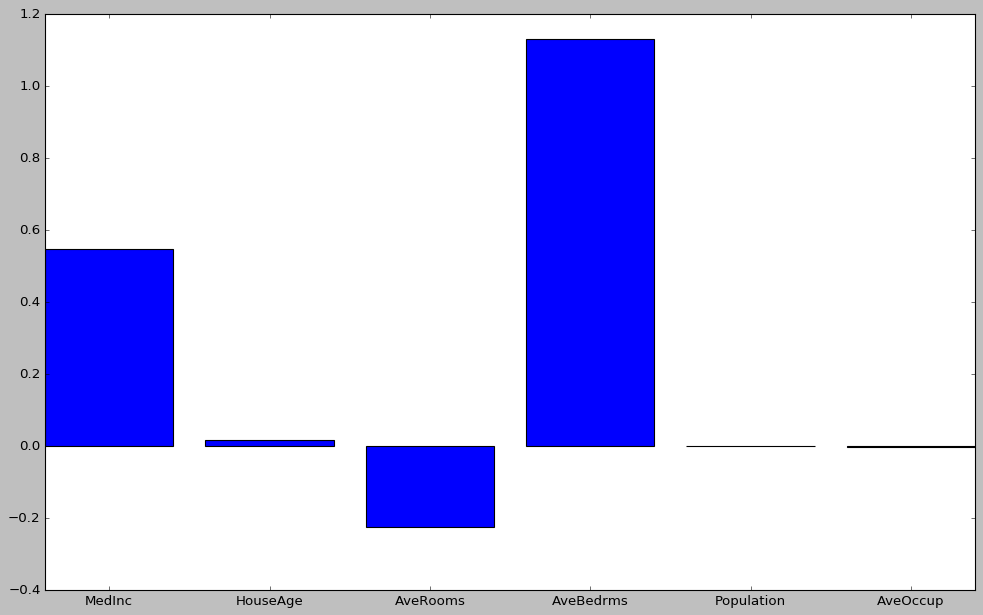

In [88]:
## verificando os pesos

plt.figure(figsize=(15,9))
plt.bar(x = x_train.columns,height=lr.coef_)
plt.show()

In [132]:
## MSE de teste do modelo

y_pred = lr.predict(x_test)
mean_squared_error(y_test,y_pred)

0.6287121228743695

In [133]:
## RMSE de teste do modelo

np.sqrt(mean_squared_error(y_test,y_pred))

0.7929136919453273

In [92]:
## avaliação no treino

y_pred_train = lr.predict(x_train)

print(mean_squared_error(y_train,y_pred_train))
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))

0.6095938146479588
0.7807648907628716


In [ ]:
## o que é uma regressão linear simples
## o que é uma regressão linear múltipla
## o que são os pesos em .coef e o que é o .intercept
## como treinar um modelo de regressão linear
## como treinar um modelo de regressão múltipla
## como avaliar uma métrica (MSE ou RMSE) para treino e teste
## como utilizar uma métrica para dizer se um modelo está bom ou não

In [135]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [145]:
dt = DecisionTreeRegressor(max_depth=3,min_samples_leaf=10)
svr = SVR()
mlp = MLPRegressor()

In [146]:
dt.fit(x_train,y_train)
svr.fit(x_train,y_train)
mlp.fit(x_train,y_train)

MLPRegressor()

In [147]:
mean_squared_error(y_test,dt.predict(x_test))

0.640829077514131

In [148]:
mean_squared_error(y_test,svr.predict(x_test))

1.3530072831644446

In [149]:
mean_squared_error(y_test,mlp.predict(x_test))

1.4684626374803027

In [150]:
mean_squared_error(y_test,lr.predict(x_test))

0.6287121228743695